# Import Required Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Load Data

In [2]:
DF = pd.read_csv("./data/cardio_train.csv")

In [3]:
DF

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Add BMI column

In [30]:
DF["BMI"] = DF["weight"]/((DF["height"]/100)**2)

In [31]:
DF.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [32]:
y = DF[["cardio"]]

In [33]:
y

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


In [34]:
X = DF[[col for col in DF.columns if col not in ["cardio", "id"]]]

In [35]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI
0,18393,2,168,62.0,110,80,1,1,0,0,1,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,26.927438
69996,22601,1,158,126.0,140,90,2,2,0,0,1,50.472681
69997,19066,2,183,105.0,180,90,3,1,0,1,0,31.353579
69998,22431,1,163,72.0,135,80,1,2,0,0,0,27.099251


## Scale Data

In [36]:
scaler = StandardScaler().fit(X)

scaled = scaler.transform(X)

X = pd.DataFrame(scaled, columns=X.columns)
X2 = X[[col for col in X.columns if col != "BMI"]]

In [37]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI
0,-0.436062,1.364055,0.443452,-0.847873,-0.122182,-0.088238,-0.539322,-0.395720,-0.310879,-0.238384,0.494167,-0.917577
1,0.307686,-0.733108,-1.018168,0.749831,0.072610,-0.035180,2.400793,-0.395720,-0.310879,-0.238384,0.494167,1.210081
2,-0.247997,-0.733108,0.078047,-0.708942,0.007679,-0.141297,2.400793,-0.395720,-0.310879,-0.238384,-2.023607,-0.664652
3,-0.748152,1.364055,0.565254,0.541435,0.137541,0.017879,-0.539322,-0.395720,-0.310879,-0.238384,0.494167,0.189440
4,-0.808543,-0.733108,-1.018168,-1.264666,-0.187113,-0.194356,-0.539322,-0.395720,-0.310879,-0.238384,-2.023607,-0.746181
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.092762,1.364055,0.443452,0.124642,-0.057251,-0.088238,-0.539322,-0.395720,3.216684,-0.238384,0.494167,-0.103271
69996,1.269492,-0.733108,-0.774565,3.597913,0.072610,-0.035180,0.930735,1.351719,-0.310879,-0.238384,0.494167,3.762011
69997,-0.163286,1.364055,2.270477,2.139139,0.332333,-0.035180,2.400793,-0.395720,-0.310879,4.194906,-2.023607,0.623342
69998,1.200589,-0.733108,-0.165556,-0.153219,0.040145,-0.088238,-0.539322,1.351719,-0.310879,-0.238384,-2.023607,-0.075066


In [38]:
X2

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,-0.436062,1.364055,0.443452,-0.847873,-0.122182,-0.088238,-0.539322,-0.395720,-0.310879,-0.238384,0.494167
1,0.307686,-0.733108,-1.018168,0.749831,0.072610,-0.035180,2.400793,-0.395720,-0.310879,-0.238384,0.494167
2,-0.247997,-0.733108,0.078047,-0.708942,0.007679,-0.141297,2.400793,-0.395720,-0.310879,-0.238384,-2.023607
3,-0.748152,1.364055,0.565254,0.541435,0.137541,0.017879,-0.539322,-0.395720,-0.310879,-0.238384,0.494167
4,-0.808543,-0.733108,-1.018168,-1.264666,-0.187113,-0.194356,-0.539322,-0.395720,-0.310879,-0.238384,-2.023607
...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.092762,1.364055,0.443452,0.124642,-0.057251,-0.088238,-0.539322,-0.395720,3.216684,-0.238384,0.494167
69996,1.269492,-0.733108,-0.774565,3.597913,0.072610,-0.035180,0.930735,1.351719,-0.310879,-0.238384,0.494167
69997,-0.163286,1.364055,2.270477,2.139139,0.332333,-0.035180,2.400793,-0.395720,-0.310879,4.194906,-2.023607
69998,1.200589,-0.733108,-0.165556,-0.153219,0.040145,-0.088238,-0.539322,1.351719,-0.310879,-0.238384,-2.023607


In [39]:
y = y.values.reshape((y.shape[0],))

# Multi-layer Perceptron Classifer

# Model A Configuration

- Hidden Layer Sizes = (32, 64)
- Alpha = 0.0001
- Max Iteration = 1000
- Tolerance = 0.00001

In [17]:
model_A = MLPClassifier(hidden_layer_sizes=(32, 64), alpha=0.0001, max_iter=1000, tol=0.000001)

## Train Model A

In [18]:
model_A = model_A.fit(X, y)

## Grade Model A Performance

In [19]:
model_A_results = cross_validate(model_A, X, y, cv=5, scoring=["accuracy"], return_train_score=True)

In [20]:
model_A_results = pd.DataFrame(model_A_results)
model_A_results

,fit_time,score_time,test_accuracy,train_accuracy
0,64.606447,0.017416,0.725786,0.749429
1,67.722142,0.014969,0.732643,0.749179
2,41.539964,0.012918,0.730643,0.745143
3,73.988722,0.011511,0.730143,0.744518
4,31.128001,0.011868,0.728500,0.745375


In [21]:
print(f"Average train accuracy: {model_A_results['train_accuracy'].mean() * 100}%")
print(f"Average test accuracy: {model_A_results['test_accuracy'].mean() * 100}%")

Average train accuracy: 74.67285714285714%
Average test accuracy: 72.9542857142857%


## Train Model A without BMI column

In [22]:
model_A_without_BMI = MLPClassifier(hidden_layer_sizes=(32, 64), alpha=0.0001, max_iter=1000, tol=0.000001)

In [23]:
model_A_without_BMI = model_A_without_BMI.fit(X2, y)

## Grade Model A Performance without BMI Column

In [24]:
model_A_without_BMI_results = cross_validate(model_A_without_BMI, X2, y, cv=5, scoring=["accuracy"], return_train_score=True)

In [25]:
model_A_without_BMI_results = pd.DataFrame(model_A_without_BMI_results)
model_A_without_BMI_results

,fit_time,score_time,test_accuracy,train_accuracy
0,44.811652,0.009586,0.724357,0.749429
1,48.780066,0.009588,0.731643,0.747893
2,50.337945,0.011079,0.728714,0.746375
3,31.826317,0.009605,0.732286,0.744607
4,54.868436,0.011458,0.729500,0.749161


In [26]:
print(f"Average train accuracy: {model_A_without_BMI_results['train_accuracy'].mean() * 100}%")
print(f"Average test accuracy: {model_A_without_BMI_results['test_accuracy'].mean() * 100}%")

Average train accuracy: 74.74928571428572%
Average test accuracy: 72.92999999999999%


# Model B Configuration

- Hidden Layer Sizes = (24, 48)
- Alpha = 0.0001
- Max Iteration = 1000
- Tolerance = 0.00001

In [27]:
model_B = MLPClassifier(hidden_layer_sizes=(24, 48), alpha=0.0001, max_iter=500, tol=0.000001)

## Train Model B

In [28]:
model_B = model_B.fit(X, y)

## Grade Model B Performance 

In [29]:
model_B_results = cross_validate(model_B, X, y, cv=5, scoring=["accuracy"], return_train_score=True)

In [30]:
model_B_results = pd.DataFrame(model_B_results)
model_B_results

,fit_time,score_time,test_accuracy,train_accuracy
0,47.875960,0.007446,0.729786,0.745714
1,43.116194,0.007214,0.736571,0.743696
2,28.921808,0.007086,0.734929,0.744857
3,31.496931,0.008116,0.732571,0.740482
4,23.503256,0.007276,0.730000,0.743036


In [31]:
print(f"Average train accuracy: {model_B_results['train_accuracy'].mean() * 100}%")
print(f"Average test accuracy: {model_B_results['test_accuracy'].mean() * 100}%")

Average train accuracy: 74.35571428571428%
Average test accuracy: 73.27714285714286%


## Train Model B without BMI column

In [32]:
model_B_without_BMI = MLPClassifier(hidden_layer_sizes=(24, 48), alpha=0.0001, max_iter=500, tol=0.000001)

In [33]:
model_B_without_BMI = model_B_without_BMI.fit(X2, y)

## Grade Model B Performance without BMI Column

In [34]:
model_B_without_BMI_results = cross_validate(model_B_without_BMI, X2, y, cv=5, scoring=["accuracy"], return_train_score=True)

In [35]:
model_B_without_BMI_results = pd.DataFrame(model_B_without_BMI_results)
model_B_without_BMI_results

,fit_time,score_time,test_accuracy,train_accuracy
0,32.796250,0.007050,0.728286,0.744036
1,31.321504,0.007998,0.737929,0.742607
2,29.811101,0.007019,0.733500,0.743143
3,24.924349,0.007077,0.733214,0.741875
4,80.350200,0.009856,0.727429,0.746946


In [36]:
print(f"Average train accuracy: {model_B_without_BMI_results['train_accuracy'].mean() * 100}%")
print(f"Average test accuracy: {model_B_without_BMI_results['test_accuracy'].mean() * 100}%")

Average train accuracy: 74.37214285714285%
Average test accuracy: 73.20714285714286%


# Model C Configuration

- Hidden Layer Sizes = (50,)
- Alpha = 0.0001
- Max Iteration = 1000
- Tolerance = 0.00001

In [37]:
model_C = MLPClassifier(hidden_layer_sizes=(50,), alpha=0.0001, max_iter=500, tol=0.000001)

## Train Model C  

In [38]:
model_C = model_C.fit(X, y)

## Grade Model C Performance 

In [39]:
model_C_results = cross_validate(model_C, X, y, cv=5, scoring=["accuracy"], return_train_score=True)

In [40]:
model_C_results = pd.DataFrame(model_C_results)
model_C_results

,fit_time,score_time,test_accuracy,train_accuracy
0,25.815532,0.005539,0.730143,0.739839
1,15.671512,0.005538,0.739286,0.736286
2,14.916142,0.005518,0.732786,0.737536
3,17.376283,0.005635,0.734000,0.739161
4,25.094196,0.015514,0.732071,0.738875


In [41]:
print(f"Average train accuracy: {model_C_results['train_accuracy'].mean() * 100}%")
print(f"Average test accuracy: {model_C_results['test_accuracy'].mean() * 100}%")

Average train accuracy: 73.83392857142856%
Average test accuracy: 73.36571428571428%


## Train Model C without BMI column

In [42]:
model_C_without_BMI = MLPClassifier(hidden_layer_sizes=(50), alpha=0.0001, max_iter=500, tol=0.000001)

In [43]:
model_C_without_BMI = model_C_without_BMI.fit(X2, y)

## Grade Model C Performance without BMI Column

In [44]:
model_C_without_BMI_results = cross_validate(model_C_without_BMI, X2, y, cv=5, scoring=["accuracy"], return_train_score=True)

In [45]:
model_C_without_BMI_results = pd.DataFrame(model_C_without_BMI_results)
model_C_without_BMI_results

,fit_time,score_time,test_accuracy,train_accuracy
0,20.543698,0.005628,0.730786,0.740518
1,16.414724,0.005443,0.741643,0.737089
2,14.019984,0.005595,0.735286,0.738214
3,20.359360,0.005431,0.734000,0.737625
4,16.952305,0.005476,0.730500,0.738964


In [46]:
print(f"Average train accuracy: {model_C_without_BMI_results['train_accuracy'].mean() * 100}%")
print(f"Average test accuracy: {model_C_without_BMI_results['test_accuracy'].mean() * 100}%")

Average train accuracy: 73.84821428571429%
Average test accuracy: 73.44428571428571%


## Generate heatmap for Features

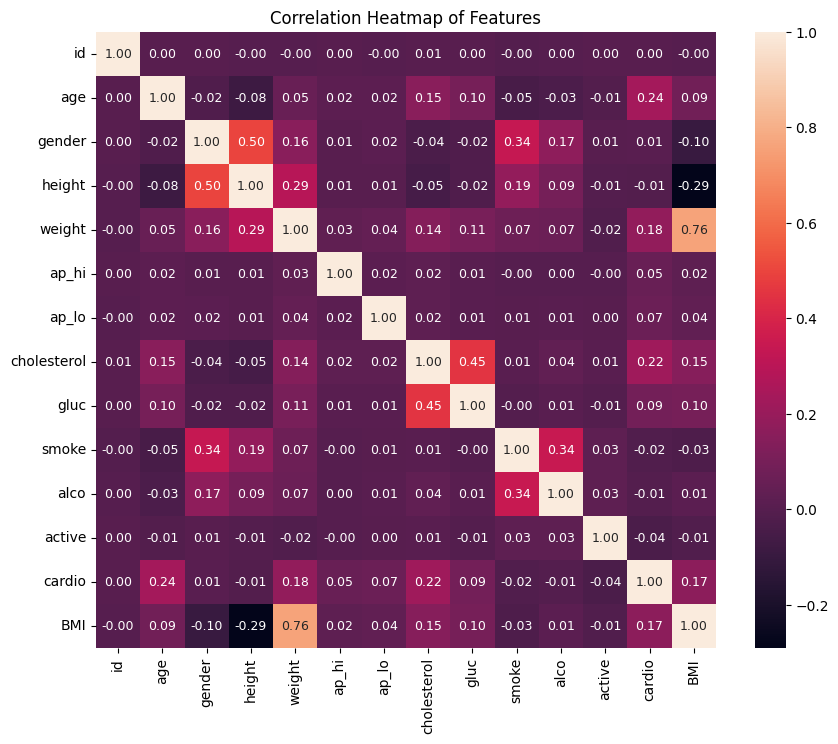

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(DF.corr(), annot=True, fmt=".2f", annot_kws={"size": 9})
plt.title('Correlation Heatmap of Features')
plt.savefig('figures/correlation_heatmap')
plt.show()

# Logistic Regression Classifier

## Model D with BMI column

In [40]:
regression_model_D = LogisticRegression(max_iter=1000)

In [41]:
regression_model_D.fit(X, y)

LogisticRegression(max_iter=1000)

In [42]:
print(f'Accuracy: {regression_model_D.score(X, y) * 100}%')

Accuracy: 72.11571428571429%


## Model D without BMI column

In [43]:
regression_model_D_without_BMI = LogisticRegression(max_iter=1000)

In [44]:
regression_model_D_without_BMI.fit(X2, y)

LogisticRegression(max_iter=1000)

In [45]:
print(f'Accuracy: {regression_model_D_without_BMI.score(X2, y) * 100}%')

Accuracy: 72.12285714285714%
